In [2]:
# Import relevant libraries, packages, and modules.

### YOUR CODE HERE ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [3]:
data = pd.read_csv("modified_c4_epa_air_quality.csv")

In [4]:
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

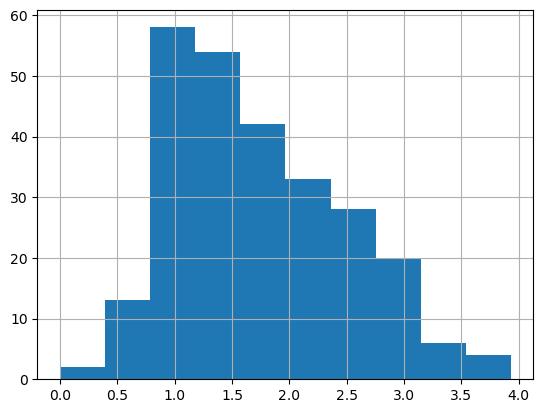

In [5]:
# Create a histogram to visualize distribution of aqi_log.


data["aqi_log"].hist();

In [6]:
#mean
mean_aqi_log = data["aqi_log"].mean()
print(mean_aqi_log)

1.7669210929985582


In [7]:
#Std deviation
std_aqi_log = data["aqi_log"].std()
print(std_aqi_log)

0.7147155520223721


check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [8]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = mean_aqi_log - 1 * std_aqi_log
upper_limit = mean_aqi_log + 1 * std_aqi_log
print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


In [9]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

76.15384615384615

In [10]:
# Define variable for lower limit, 2 standard deviations below the mean.

lower_limit = mean_aqi_log - 2 * std_aqi_log
upper_limit = mean_aqi_log + 2 * std_aqi_log
print(lower_limit, upper_limit)

0.3374899889538139 3.1963521970433026


In [11]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit = mean_aqi_log - 3 * std_aqi_log
upper_limit = mean_aqi_log + 3 * std_aqi_log
print(lower_limit, upper_limit)

-0.37722556306855815 3.9110677490656744


In [12]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

data["z_score"] = stats.zscore(data["aqi_log"], ddof=1) # ddof=degrees of freedom correction (sample vs. population)

data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


In [13]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean

data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


In [14]:
data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
count,260,260,260,260,257,260,260,260.000000,2.600000e+02
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.766921,-2.989062e-16
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714716,1.000000e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-2.472202e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098612,-9.350696e-01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.791759,3.475281e-02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.302585,7.494786e-01


In [15]:
population_mean = data['aqi'].mean()
population_mean

KeyError: 'aqi'